### Pandas
    Pandas는 Panel Datas의 약자
    파이썬을 이용한 데이터 분석에서 가장 많이 사용되는 라이브러리
    Numpy 기반으로 만들어졌다.
    
    Pandas 자료구조
    1. Series - 1차원 배열(벡터)
    
    2. DataFrame - 2차원 배열(매트릭스) 가장 중요(표형식):엑셀
    
    3. Panel - 3차원(대상 아님)

#### Series
    시리즈 생성, 구조확인

In [3]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt

In [7]:
'''
index 속성없이 시리즈를 생성하면
인덱스는 자동적으로 0~n-1까지 정수로 잡힌다.
'''
ser1 = Series(np.random.randint(10,20,5), index=list("abcde"))
ser1
print(ser1.index)
print(ser1.values)
print(ser1.dtype)
print(ser1)

Index(['a', 'b', 'c', 'd', 'e'], dtype='object')
[12 11 15 15 14]
int32
a    12
b    11
c    15
d    15
e    14
dtype: int32


#### 시리즈 값 조회하기
    단일값을 선택하거나 여러값을 선택할 때
    1) 인덱스로 라벨을 사용할 수 있다.
    
    2)슬라이싱 방법
        - 라벨 사용 : 마지막 라벨 포함됨 ['a' : 'b']
        - 숫자 사용 : 마지막 숫자 포함 안됨

In [11]:
ser1

a    12
b    11
c    15
d    15
e    14
dtype: int32

In [12]:
ser1[0]
ser1["a"]
# 슿라이싱에서 숫자를 사용 | 라벨을 사용하는 경우
print(ser1[1:4])
print(ser1["b":"d"])

b    11
c    15
d    15
dtype: int32
b    11
c    15
d    15
dtype: int32


In [17]:
# 응용해서 조회하기 : 아래 2개의 표현법을 구분하자
ser1[:2]
print(ser1[:2])
ser1_1 = ser1[::2]
print(ser1_1)

a    12
b    11
dtype: int32
a    12
c    15
e    14
dtype: int32


In [18]:
# 시리즈 간의 연산

# NaN -> 데이터 X, 결측값...누락데이터
# 시리즈 -> 1차원 배열(따라서 capper가 크면 그것에 따라 성질이 맞춰짐)
resSer = ser1 + ser1_1
print(resSer)

a    24.0
b     NaN
c    30.0
d     NaN
e    28.0
dtype: float64


#### 누락 데이터 조회하기
    isnull() | notnull()

In [19]:
resSer

a    24.0
b     NaN
c    30.0
d     NaN
e    28.0
dtype: float64

In [26]:
print(resSer.isnull())
print(resSer[resSer.isnull()])
print("*"*30)
print(resSer.notnull())
print(resSer[resSer.notnull()])
print("*"*30)
print(resSer.isnull().sum())

a    False
b     True
c    False
d     True
e    False
dtype: bool
b   NaN
d   NaN
dtype: float64
******************************
a     True
b    False
c     True
d    False
e     True
dtype: bool
a    24.0
c    30.0
e    28.0
dtype: float64
******************************
2


### Pandas를 이용한 시각화
#### 누락데이터가 아닌 데이터를 한눈에 보여준다.

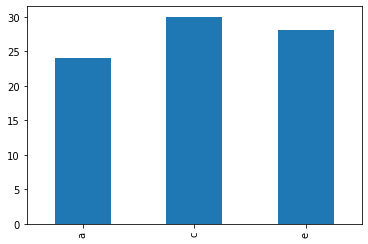

In [29]:
resSer[resSer.notnull()].plot(kind="bar")
#resSer[resSer.isnull()].plot(kind="bar")
plt.show()

### DataFrame
#### DataFrame - 생성
    DataFrame은 2차원 배열형식, 표같은 스트레드시트 자료구조
    여러 개의 컬럼을 가지며 서로 다른 종류의 값이 담긴다.
    
    DataFrame은 다양한 방식으로 생성되지만 가장 흔하게 생성하는 방법
    1) 리스트를 값으로 가지는 딕셔너리 방법으로 생성
    2) Numpy 배열을 이용해서 생성
    3) read_csv(), read_excel()함수 등을 이용해서 생성

In [30]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt

In [33]:
# 1. 딕셔너리를 이용해서 생성
df_dic = {
        "state":['Ohio','Ohio','Ohio','Nevada','Nevada','Nevada'],
        "year":[2000, 2001, 2002, 2001, 2002, 2003],
        'pop':[1.5, 1.7, 3.6, 2.4, 2.9, 3.2]
}

#시리즈의 결합체 -> 데이터프레임(서로 다른 타입들의 컬럼값을 가짐)
dicDf = DataFrame(df_dic)
dicDf

,state,year,pop
0,Ohio,2000,1.5
1,Ohio,2001,1.7
2,Ohio,2002,3.6
3,Nevada,2001,2.4
4,Nevada,2002,2.9
5,Nevada,2003,3.2


In [38]:
print(type(dicDf.state))
print(type(dicDf.year))
print(type(dicDf.pop))
print(type(dicDf["pop"]))

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'method'>
<class 'pandas.core.series.Series'>


In [36]:
print(type(dicDf))

<class 'pandas.core.frame.DataFrame'>


In [39]:
data1 = {'name': ['James','Peter','Jane','Tomas'],
       'address':["NY","NY","LA","Texas"],
       "age":[33,44,55,66]
      }

df1 = DataFrame(data1)
df1

,name,address,age
0,James,NY,33
1,Peter,NY,44
2,Jane,LA,55
3,Tomas,Texas,66


In [43]:
# 2. random 함수 사용하기
df2 = DataFrame(np.random.randint(10,100,16).reshape(4,4),
               columns = list('abcd'),
               index = list("abcd")) # 키워드 매개변수 -> 매개변수명을 알고 사용
                                     #                    순서는 상관 없음
    
# columns를 사용해서 컬럼명을 수정
df2.columns = ["one","two","three","four"]
df2

,one,two,three,four
a,81,86,39,39
b,94,80,21,76
c,96,83,50,96
d,29,63,46,19


In [44]:
# 3. read_csv()를 이용해서 생성

df3 = pd.read_csv("../data/tips.csv")
df3

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2.0
1,10.34,1.66,Male,No,Sun,Dinner,3.0
2,21.01,3.50,Male,No,Sun,Dinner,3.0
3,23.68,3.31,Male,No,Sun,Dinner,2.0
4,24.59,3.61,Female,No,Sun,Dinner,4.0
...,...,...,...,...,...,...,...
240,27.18,2.00,Female,Yes,Sat,Dinner,2.0
241,22.67,2.00,Male,Yes,Sat,Dinner,2.0
242,17.82,1.75,Male,No,Sat,Dinner,2.0
243,18.78,3.00,Female,No,Thur,Dinner,2.0
